In [1]:
import numpy as np
from matplotlib import pyplot as plt

from realobjects_env import UR5Env
from object_env import *

In [2]:
env = UR5Env(render=True, camera_height=96, camera_width=96, control_freq=5, data_format='NHWC', testset=False)
oe = objectwise_env(env, num_blocks=4, mov_dist=0.07, max_steps=20, detection=False)

Creating window glfw


In [ ]:
_ = oe.reset()
for b in range(4):
    for th in range(4):
        oe.step([3-b, 2*th])

KeyboardInterrupt: 

In [ ]:
obj = 2
for th in range(8):
    oe.step([obj, th])

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from realobjects_env import UR5Env
from pushpixel_env import pushpixel_env
from object_env import objectwise_env

In [2]:
env = UR5Env(render=True, camera_height=480, camera_width=480, camera_depth=True, control_freq=5, data_format='NHWC')
pe = pushpixel_env(env, num_blocks=3, mov_dist=0.05)
oe = objectwise_env(env, num_blocks=0, mov_dist=0.07, max_steps=20, detection=False)

Creating window glfw


In [3]:
s = oe.reset()

In [6]:
s = oe.step([0, 0])

In [4]:
rgb = s[0][1][0]
depth = s[0][1][1]

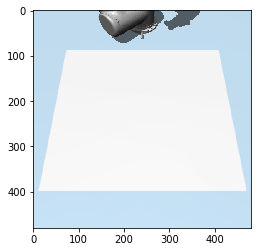

In [5]:
plt.imshow(rgb)

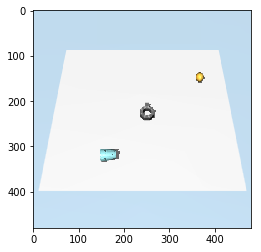

In [18]:
cp = copy.deepcopy(rgb)
cp[:75, 140:370] = [0.75294118, 0.85882353, 0.93333333]
plt.imshow(cp)

In [12]:
zNear = 0.01
zFar = 50

def process(depth):
    return zNear / (1 - depth * (1 - zNear / zFar))

In [33]:
process(depth)

array([[4.7890573, 4.7890573, 4.7890573, ..., 4.7890573, 4.7890573,
        4.7890573],
       [4.7579145, 4.7579145, 4.7579145, ..., 4.7579145, 4.7579145,
        4.7579145],
       [4.727148 , 4.727148 , 4.727148 , ..., 4.727148 , 4.727148 ,
        4.727148 ],
       ...,
       [2.9763408, 2.9763408, 2.9763408, ..., 2.9763408, 2.9763408,
        2.9763408],
       [2.9642773, 2.9642773, 2.9642773, ..., 2.9642773, 2.9642773,
        2.9642773],
       [2.9523058, 2.9523058, 2.9523058, ..., 2.9523058, 2.9523058,
        2.9523058]], dtype=float32)

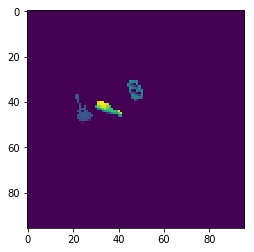

In [6]:
depth_bg = np.load('depth_bg.npy')
plt.imshow(depth_bg - depth)

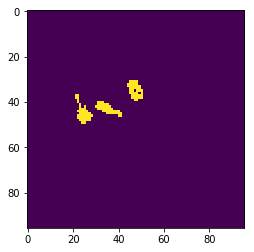

In [8]:
depth_bg = np.load('depth_bg.npy')
plt.imshow((depth_bg - depth)>0)

In [29]:
process(depth).min()

0.29523057

In [30]:
process(depth).max()

0.47890568

In [31]:
env.sim.model.cam_pos[1]

array([0.  , 0.65, 1.75])

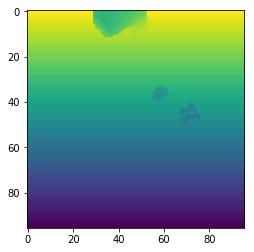

In [6]:
plt.imshow(depth)

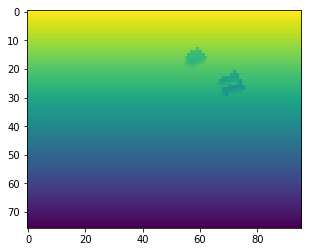

In [18]:
plt.imshow(depth[20:])

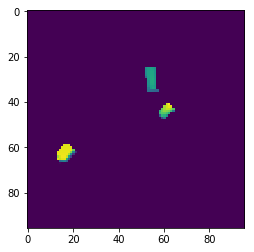

In [35]:
plt.imshow(depth_bg - depth)

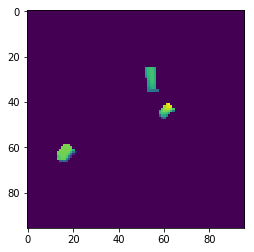

In [41]:
plt.imshow(process(depth_bg) - process(depth))

In [37]:
process(depth_bg - depth).max()

0.100143224

In [38]:
process(depth_bg - depth).min()

0.1

In [39]:
(process(depth_bg) - process(depth)).max()

0.19340229

In [40]:
(process(depth_bg) - process(depth)).min()

0.0

In [14]:
(depth_bg - depth).max()

0.0012757778

In [22]:
depth_bg[20:].min()

0.9663214

In [20]:
depth[20:].max()

0.9765794

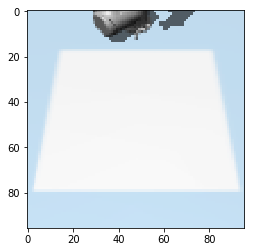

In [82]:
plt.imshow(s[0][1][0])

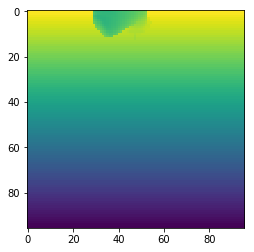

In [81]:
plt.imshow(s[0][1][1])

In [10]:
bg = np.load('depth_bg.npy')

In [13]:
process(bg)

array([[0.47890568, 0.47890568, 0.47890568, ..., 0.47890568, 0.47890568,
        0.47890568],
       [0.47579145, 0.47579145, 0.47579145, ..., 0.47579145, 0.47579145,
        0.47579145],
       [0.4727148 , 0.4727148 , 0.4727148 , ..., 0.4727148 , 0.4727148 ,
        0.4727148 ],
       ...,
       [0.29763407, 0.29763407, 0.29763407, ..., 0.29763407, 0.29763407,
        0.29763407],
       [0.2964277 , 0.2964277 , 0.2964277 , ..., 0.2964277 , 0.2964277 ,
        0.2964277 ],
       [0.29523057, 0.29523057, 0.29523057, ..., 0.29523057, 0.29523057,
        0.29523057]], dtype=float32)

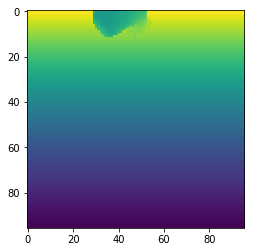

In [14]:
plt.imshow(process(bg))

In [15]:
np.save('depth_bg', process(bg))

In [7]:
s[0][1][10,10]

array([0.75294118, 0.85882353, 0.93333333])

In [9]:
s[0][1][20,20]

array([0.95686275, 0.95686275, 0.95686275])

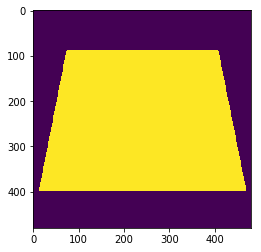

In [14]:
ws_mask = rgb.sum(2)>2.8
ws_mask[:50] = False
plt.imshow(ws_mask)

In [17]:
x, y = np.where(ws_mask)
print(x.min())
print(x.max())
print(y.min())
print(y.max())

88
397
13
469


In [18]:
np.save('workspace_mask_480', ws_mask)

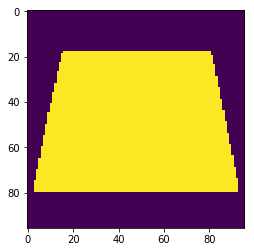

In [69]:
plt.imshow(s[0][1].sum(2)>2.8)

In [74]:
np.save('workspace_mask', (s[0][1].sum(2)>2.8))

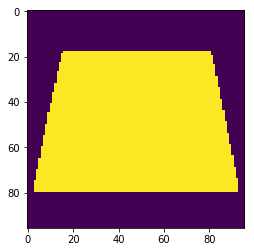

In [76]:
plt.imshow(np.load('workspace_mask.npy'))

In [70]:
x, y = np.where((s[0][1].sum(2)>2.8))
print(x.max(), y.min())
print(x.min(), y.max())

79 3
18 92


In [102]:
(s[0][1][0].sum(2)>2.80)[79,3]

True

In [100]:
(s[0][1][0].sum(2)>2.8)[18, 80]

True

In [104]:
(s[0][1][0].sum(2)>2.8)[18, 16]

True

In [6]:
np.array(pe.pixel2pos(79, 3)) - np.array(pe.pixel2pos(76, 3))

array([-0.0043305 ,  0.02230346,  0.        ])

In [8]:
np.array(pe.pixel2pos(16, 3)) - np.array(pe.pixel2pos(13, 3))

array([-0.00820867,  0.04227728,  0.        ])

In [108]:
pe.pixel2pos(18, 80)

(-0.31866172121121544, -0.18570916103826574, 0.9)

In [106]:
pe.pixel2pos(79, 92)

(-0.322811816710367, 0.42187227880489253, 0.9)

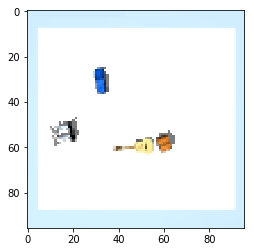

In [12]:
cp = copy.deepcopy(s[0][1])
cp[:3, 2:43] = [0.81960784, 0.93333333, 1.]
plt.imshow(cp)

In [8]:
s[0][1].shape

(96, 96, 3)

In [4]:
i = pe.reset()

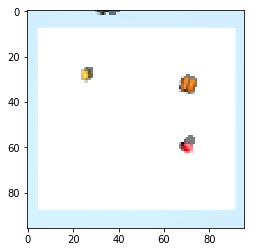

In [5]:
plt.imshow(i[0])

In [6]:
px, py = np.where(i[0].sum(axis=2) == 3)

In [7]:
px.min()

8

In [8]:
px.max()

86

In [9]:
py.min()

5

In [10]:
py.max()

90

In [14]:
i[0][48,4]

array([0.85490196, 0.95686275, 1.        ])

In [12]:
i[0][48,91]

array([0.93333333, 0.98431373, 1.        ])

In [23]:
im = Image.open('make_urdf/textures/table_v1.png')

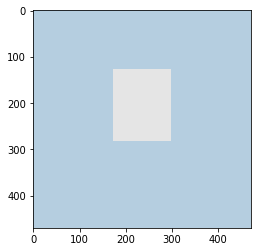

In [12]:
plt.imshow(im)

In [13]:
px, py, _ = np.where(np.array(im)==[229,229,229])

In [14]:
px.min()

127

In [15]:
px.max()

282

In [16]:
py.min()

173

In [17]:
py.max()

296

In [24]:
t = np.array(im)
t[112:300, 153:316] = [229, 229, 229]
im_new = Image.fromarray(t)
im_new.save('make_urdf/textures/table_test.png')

In [33]:
t = np.array(im)
t[127:282, 173:296] = [229, 229, 229]
im_new = Image.fromarray(t)
im_new.save('make_urdf/textures/table_t.png')

In [3]:
env.move_to_pos([0.35, 0.35, 1.05])

In [4]:
env.move_to_pos([0.45, 0.35, 1.05])

In [4]:
env.move_to_pos([-0.4, 0.4, 1.05])

In [15]:
env.move_to_pos([-0., -0.22, 1.05])

In [11]:
env.move_to_pos([-0.3, 0.4, 1.05])

In [3]:
_ = pe.reset()

In [14]:
pe.pos2pixel(-0.35, -0.22)

(93, 7)

In [15]:
pe.pixel2pos(40, 93)

(-0.3494926932522989, 0.0378679656448124, 0.9)

In [5]:
x = pe.reset()

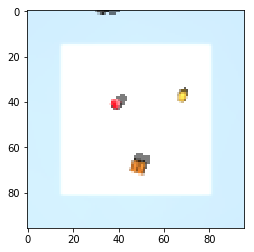

In [12]:
plt.imshow(x[0])

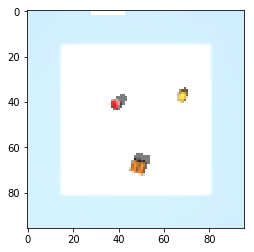

In [43]:
y = copy.deepcopy(x[0])
y[:2, 28:43] = [1, 1, 1]
plt.imshow(y)

TypeError: Invalid dimensions for image data

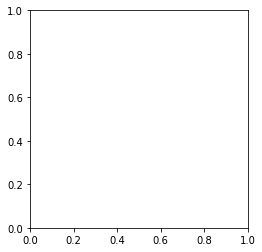

In [32]:
pe.move2pixel(0, 87)

TypeError: Invalid dimensions for image data

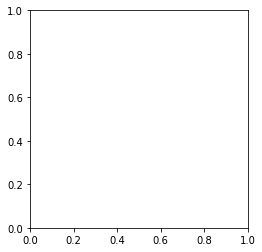

In [12]:
pe.move2pixel(100, 87)